In [1]:
from sklearn.pipeline import Pipeline
from pymks.fmks.bases.primitive import PrimitiveTransformer
from pymks.fmks.correlations import TwoPointcorrelation
from pymks.fmks.data.checkerboard import generate


In [2]:
x_data = generate((21 * 8, 21 * 8), (21, 21))


In [3]:
model = Pipeline(steps=[
    ('discretize', PrimitiveTransformer(n_state=2, min_=0.0, max_=1.0)),
    ('correlations', TwoPointcorrelation(periodic_boundary=None))
])

In [4]:
# x_auto = model.transform(x_data).compute()


In [ ]:
a=x_data.compute()

In [ ]:
a.shape

(1, 168, 168)

In [ ]:
import matplotlib.pyplot as plt


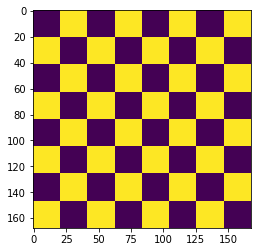

In [ ]:
plt.imshow(a[0])

In [ ]:
x_auto = model.transform(x_data).compute()
x_auto

> /home/berkay/Projects/pymks/pymks/fmks/correlations.py(160)nonperiodic_padder()
    159     import ipdb; ipdb.set_trace()
--> 160     return da.pad(
    161         arr, cutoff_, mode="constant", constant_values=0

ipdb> p cutoff_
[(168, 168), (168, 168)]
ipdb> n
> /home/berkay/Projects/pymks/pymks/fmks/correlations.py(161)nonperiodic_padder()
    160     return da.pad(
--> 161         arr, cutoff_, mode="constant", constant_values=0
    162     )

ipdb> n
TypeError: `pad_value` must be composed of integral typed values.
> /home/berkay/Projects/pymks/pymks/fmks/correlations.py(161)nonperiodic_padder()
    160     return da.pad(
--> 161         arr, cutoff_, mode="constant", constant_values=0
    162     )



In [3]:
import dask.array as da
import numpy as np

In [16]:
from pymks.fmks.func import map_blocks

In [17]:
aa = da.ones((3, 5, 5), chunks=(1, 5, 5))

In [26]:
def func(nparr):
    return np.pad(nparr, [(0, 0), (3, 3), (4, 4)], mode="constant", constant_values=0)

In [36]:
map_blocks(func, aa, chunks=(1, 11, 13)).compute()

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
      

In [22]:
da.pad(da.ones([1, 5, 5]), (1, 5, 5), mode="constant", constant_values=0)

TypeError: `pad_value` must be composed of integral typed values.

In [ ]:
## Correlations line 167 



In [10]:
import numpy as np
ber=np.arange(100).reshape(1,10,10)

In [11]:
from pymks.fmks.correlations import center_slice,auto_correlation

In [12]:
center_slice(ber,4).shape

(1, 9, 9)

In [13]:
ber

array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]])

center_slice() it only accepts 3D array cuts the array if it is (1,10,10)

ber=np.arange(100).reshape(1,10,10)
from pymks.fmks.correlations import center_slice
center_slice(ber,1).shape

it gives 3X3

In [43]:
import dask.array as da
x_data=np.round(np.random.random(size=(1, 5,5)))
chunks=x_data.shape
x_data = da.from_array(x_data, chunks=chunks)
print(x_data.shape)
f_data=auto_correlation(x_data)

(1, 5, 5)


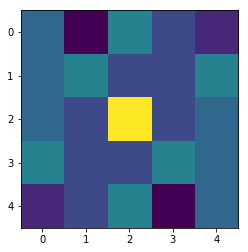

In [45]:
plt.imshow(f_data[0])

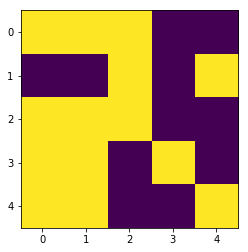

In [39]:
plt.imshow(np.round(np.random.random(size=(5,5))))